In [336]:
import pandas as pd
import numpy as np
# The kmeans algorithm is implemented in the scikits-learn library
from sklearn.cluster import KMeans
import gensim.models as g
from datetime import datetime
from sortedcontainers import SortedSet





In [337]:
from bin.hddistance.Partition2 import Partition
from bin.hddistance.KdTree import KdTree

In [338]:
def main(posting_vectors):

    hashs = {}

    kdTree = KdTree()
    changed_partitions = SortedSet([])
    for index, row in posting_vectors.iterrows():
        hash_ = Partition.myKdHash(row['Vector'])
        try:
            square = hashs[hash_]
        except KeyError:
            square = None
        if(square is None):
            square = Partition(hash_)
        row['hash']=hash_
        square.append(row)
        kdTree.add(row['Vector'],square)
        changed_partitions.add(hash_)
        hashs[hash_] = square
    return (hashs,kdTree,changed_partitions)

In [339]:
def my_precision(vector,right_vector,weighted=True):
    #true_posirive: cada elemento em right_vector que existir em vector conta o seu peso conforme posicao em right_vector
    #false_positive: demais pesos dem weights (que não tiveram sucesso)
    if(weighted):
        weight = len(right_vector)
    else:
        weight = 1
    sum_ = 0.0
    for value1 in right_vector:
        for value2 in vector:
            if(value1 == value2):
                sum_ = sum_ + weight
        if(weighted):
            weight = weight - 1
        
    return sum_

    

In [76]:
model=".\data\doc2vec\doc2vec.bin"
posting_vectors=".\data\stanford\posting_vectors.json"
#distances_kdhash=".\data\stanford\distances_kdhash.json"
#distances_extended_kdhash=".\data\stanford\distances_extended_kdhash.json"

In [77]:
#base de dados já em vetores (mais todos os demais meta dados)
postingVectors = pd.read_json(posting_vectors)

In [8]:
#Árvore KD (kdTree), conjunto de códigos hash para todas as postagens (kdhashs) e 
#conjunto de códigos hash apenas para as postagens novas (changedPartitions) 
#que excepcionalmente nesta demonstração é equivalente ao conjunto total (kdhashs)
kdhashs,kdTree,changedPartitions = main(postingVectors)

In [ ]:
#conjunto de postagens vizinhas à primeira postagem (postingVectors['Vector'][0]) com base na margem de 0.55
hashs = kdTree.myKdHashs(postingVectors['Vector'][0],edge=0.55)

In [ ]:
#segunda
hashs_b = kdTree.myKdHashs(postingVectors['Vector'][1],edge=0.55)

In [ ]:
[[y['index'] for y in x.rows] for x in hashs_b]

In [ ]:
#hashs[1].rows[0]['index']
[[y['index'] for y in x.rows] for x in hashs]

In [15]:
#importando implementação de árvore KD do scikit learning para comparação
from sklearn.neighbors import KDTree

In [16]:
from scipy.spatial import distance

In [563]:
postingVectors.head()

,index,commentthreadid,Opinion,Question,Answer,Sentiment,Confusion,Urgency,Text,forumpostid,CourseType,coursedisplayname,Vector
0,0,"5,26331E+23",1,0,1,4,4,3,"[second, review, Although, applied, comments, ...",526563a587050a90ef000006,Medicine,Medicine/SciWrite/Fall2013,"[-0.2693302929, 0.0551648661, -0.2781109810000..."
1,1,"5,26331E+23",0,1,1,4,4,"4,5","[Also, got, Are, going, resubmit, see, get, be...",5264e2152cc6095e83000015,Medicine,Medicine/SciWrite/Fall2013,"[-0.1368487179, -0.08157795670000001, -0.11682..."
2,2,"5,26331E+23",1,0,0,3,4,"5,5","[think, system, fair, reviewers, rush, process...",5263a0de9ec9282178000010,Medicine,Medicine/SciWrite/Fall2013,"[-0.9148202538, 0.6444663405000001, 0.02416610..."
3,3,"5,30483E+23",0,0,0,5,4,2,"[Thanks, It, useful, think, answers, Corey, ge...","5,30483E+23",Humanities,HumanitiesSciences/EP101/Environmental_Physiology,"[-0.1750001609, 0.15370325740000002, -0.219730..."
4,4,51b513008e8d330d00000001,0,1,0,"3,5",4,5,"[Hello, Kristin, Thank, nice, usefull, Mooc, U...",53e1dfb0fac7aaea13000007,Medicine,Medicine/HRP258/Statistics_in_Medicine,"[-0.21092042330000002, 0.19797407090000002, -0..."


In [103]:
len(posting_vectors_sample)

2467

In [102]:
#isolando o campo Vector no dataframe vectors
posting_vectors_sample = postingVectors[postingVectors.coursedisplayname == 'HumanitiesSciences/EP101/Environmental_Physiology']#.sample(n=len(posting_vectors)//10)
vectors = pd.DataFrame(x for x in posting_vectors_sample['Vector'].astype(np.array(np.float)))

In [12]:
#construindo a árvore kd do scikit learning
tree = KDTree(vectors.values,leaf_size = 2)

In [13]:
#carregando o modelo já treinado de Doc2Vec para medir as distâncias entre vetores por wmdistance
m = g.Doc2Vec.load(model)

In [17]:
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
import statistics as stt

In [16]:
rc = random.choices(postingVectors.index, k=10)

In [16]:
rc[0]
#postingVectors.loc[postingVectors['forumpostid']==rc[0]]

27731

In [ ]:
pd.DataFrame({'similarity':[distance.cosine(postingVectors.loc[rc[0]]['Vector'], vector) for vector in postingVectors['Vector']],'forumpostid':postingVectors['forumpostid'],'Text':postingVectors['Text'],'Opinion':postingVectors['Opinion']}).sort_values('similarity')

In [86]:
sorted_d2v = pd.DataFrame({'similarity':[m.wv.wmdistance(postingVectors.loc[rc[2]]['Text'], text) for text in postingVectors['Text']],'forumpostid':postingVectors['forumpostid'],'Text':postingVectors['Text'],'Opinion':postingVectors['Opinion']}).sort_values('similarity')

In [88]:
len(sorted_my)

14066

In [20]:
sorted_my  = kdTree.myKdHashs(postingVectors.loc[rc[2]]['Vector'],edge=0.55)

In [87]:
sorted_d2v.head(n=50).index

Int64Index([ 2446,  2622, 27959,  2449, 18883, 11925,  2572,  2895, 10716,
            27974, 22166,  4328,  4354, 16960, 16794, 25345, 18029,  5544,
             6808,  1991, 15132, 28437,  6431, 24079,  2689, 10218, 13464,
             5332,  8423, 12937,  3472, 24900, 15131,  9342, 18028, 18249,
            22584,  2504, 20651, 10354,   903,  2069, 10039, 29174,  2749,
            16584,  4202, 14090,  2691, 13030],
           dtype='int64')

In [21]:
[[y['index'] for y in x.rows][0] for x in sorted_my]

[9461,
 1802,
 26467,
 11190,
 12721,
 28934,
 14233,
 28769,
 10835,
 18163,
 23830,
 20362,
 27831,
 19588,
 18955,
 25939,
 12739,
 12738,
 1563,
 4466,
 26250,
 7910,
 9812,
 13478,
 24806,
 1910,
 6687,
 1747,
 5,
 5806,
 12755,
 24766,
 4056,
 1507,
 29488,
 666,
 23800,
 2439,
 24555,
 24727,
 25774,
 9111,
 26746,
 26660,
 16656,
 3290,
 21819,
 18296,
 18194,
 1822,
 12359,
 18522,
 2316,
 26019,
 3147,
 24183,
 12686,
 17891,
 27972,
 10115,
 8,
 9073,
 6409,
 3132,
 10735,
 11916,
 1015,
 24612,
 12882,
 13661,
 7518,
 12392,
 12287,
 8564,
 1420,
 23696,
 26826,
 12741,
 9189,
 21562,
 21389,
 12789,
 19680,
 6304,
 12799,
 25985,
 26887,
 26641,
 12485,
 18966,
 14879,
 9894,
 12659,
 20418,
 9080,
 19872,
 13274,
 12493,
 26430,
 7530,
 7605,
 28325,
 14180,
 11,
 157,
 10441,
 581,
 29378,
 25345,
 7681,
 27288,
 9942,
 11511,
 18677,
 8899,
 1553,
 28102,
 13042,
 1401,
 28382,
 10330,
 10505,
 1087,
 21651,
 22878,
 26758,
 8550,
 9497,
 7847,
 9985,
 11702,
 7904,
 10

In [89]:
any_my.append(my_precision([[y['index'] for y in x.rows][0] for x in sorted_my],sorted_d2v.head(n=50).index,weighted=False))

In [18]:
postingVectors.loc[rc[2]]['Vector']

[0.08636909720000001,
 -0.0918810442,
 -0.2748268247,
 0.25228163600000003,
 0.5409644246,
 0.2059775442,
 0.2226785719,
 -0.242317155,
 -0.4160334766,
 0.027140669500000002,
 -0.2189826816,
 -0.2942459583,
 -0.1406659186,
 -0.1771007627,
 0.09935013200000001,
 0.6650042534,
 -0.3137776852,
 -0.2570526898,
 0.048082619900000005,
 0.17055611310000002,
 -0.07342200730000001,
 0.2384101301,
 0.70606637,
 -0.4561347961,
 -0.008686238,
 -0.0385794453,
 -0.2698316276,
 0.29631382230000003,
 -0.2331156433,
 -0.1801466197,
 -0.3127811253,
 0.16984988750000002,
 0.39643952250000003,
 0.1896699965,
 -0.0206330549,
 -0.17504176500000002,
 -0.07244615260000001,
 -0.0077630533,
 0.38635966180000003,
 -0.0759824291,
 -0.09510582690000001,
 0.3009041846,
 0.49403390290000004,
 0.0359693244,
 0.2029248774,
 0.3487491608,
 0.1811821312,
 0.0350349955,
 -0.0516296215,
 0.0489196591,
 -0.3573731482,
 -0.12618602810000001,
 -0.17904149,
 -0.1869940907,
 0.0933706239,
 -0.042653352000000005,
 0.21243585650

In [32]:
any_my

[1.0, 1.0, 27.0]

In [ ]:
# use gamma distribution
#shape, scale = 2.0, 2.0  # mean=4, std=2*sqrt(2)
#s = np.random.gamma(shape, scale, 1000000)
#mu = shape*scale # mean and standard deviation
#sigma = scale*np.sqrt(shape)

# create sample mean distribution
any_skl_means = []
any_my_means = []
any_tree_means = []
any_skl = []
any_my = []
any_tree = []
# sample size
meansize = 20
samplesize = 100
rc = random.choices(postingVectors.index, k=samplesize*meansize)
#teste este processo, de der certo, repita X vezes e tire a média e o erro
for i in range(0,meansize):
    any_skl.append([])
    any_my.append([])
    any_tree.append([])
    for j in range(0,samplesize):
        if(len(any_my)>=20):
            break
        k = (i+1)*j
        # sampling 500 sample from population
    #     sorted_d2v = pd.DataFrame({'similarity':[m.wv.wmdistance(postingVectors.loc[rc[0]]['Text'], text) for text in postingVectors['Text']],'forumpostid':postingVectors['forumpostid'],'Text':postingVectors['Text'],'Opinion':postingVectors['Opinion']}).sort_values('similarity')
    #     sorted_skl = pd.DataFrame({'similarity':[distance.cosine(postingVectors.loc[rc[0]]['Vector'], vector) for vector in postingVectors['Vector']],'forumpostid':postingVectors['forumpostid'],'Text':postingVectors['Text'],'Opinion':postingVectors['Opinion']}).sort_values('similarity')
    #     sorted_my  = pd.DataFrame({'similarity':kdTree.myKdHashs(postingVectors.loc[rc[0]]['Vector'],edge=0.55),'forumpostid':postingVectors['forumpostid'],'Text':postingVectors['Text'],'Opinion':postingVectors['Opinion']}).sort_values('similarity')

        sorted_my  = kdTree.myKdHashs(postingVectors.loc[rc[k]]['Vector'],edge=0.55)
        if(len(sorted_my) == 1):
            continue
        sorted_d2v = pd.DataFrame({'similarity':[m.wv.wmdistance(postingVectors.loc[rc[k]]['Text'], text) for text in postingVectors['Text']],'forumpostid':postingVectors['forumpostid'],'Text':postingVectors['Text'],'Opinion':postingVectors['Opinion']}).sort_values('similarity')
        sorted_skl = pd.DataFrame({'similarity':[distance.cosine(postingVectors.loc[rc[k]]['Vector'], vector) for vector in postingVectors['Vector']],'forumpostid':postingVectors['forumpostid'],'Text':postingVectors['Text'],'Opinion':postingVectors['Opinion']}).sort_values('similarity')
        sorted_tree  = tree.query([postingVectors.loc[rc[k]]['Vector']],k=50)[1][0]


        sorted_d2v = sorted_d2v.head(n=50).index
        sorted_skl = sorted_skl.head(n=50).index
        sorted_my  = [[y['index'] for y in x.rows][0] for x in sorted_my]



        #verifica se o primeiro de sorted_d2v está em sorted_skl e sorted_my
        #first_skl.append((sorted_d2v['forumpostid'][1] == sorted_skl['forumpostid'][1])+0.0)
        #first_skl.append((sorted_d2v['forumpostid'][1] == sorted_my['forumpostid'][1])+0.0)

        #verifica se qualquer um de sorted_d2v está em orted_skl e sorted_my

        any_skl[i].append(my_precision(sorted_skl,sorted_d2v,weighted=False))
        any_my[i].append(my_precision(sorted_my,sorted_d2v,weighted=False))
        any_tree[i].append(my_precision(sorted_tree,sorted_d2v,weighted=False))
    any_skl_means.append(stt.mean(any_skl[i]))
    any_my_means.append(stt.mean(any_my[i]))
    any_tree_means.append(stt.mean(any_tree[i]))
#     foundAny = False
#     for index, row in sorted_d2v['forumpostid'].rowtuples():
#         if(row in sorted_skl['forumpostid']):
#             any_skl.append(1.0)
#             foundAny = True
#             break
#     if(not foundAny):
#         any_skl.append(0.0)
#     foundAny = False
#     for index, row in sorted_d2v['forumpostid'].rowtuples():
#         if(row in sorted_my['forumpostid']):
#             any_my.append(1.0)
#             foundAny = True
#             break
#     if(not foundAny):
#         any_my.append(0.0)
        
    
    # collect mean of each sample
    #meansample.append(sum(rc)/len(rc))

#plt.figure(figsize=(20,10))
#plt.hist(meansample, 200, density=True, color='lightblue')
#plt.show()

In [46]:

import seaborn as sns

In [89]:
all_ = (any_my_means,any_tree_means,any_skl_means)


In [429]:
all_=".\data\stanford\sion_all.json"
all_ = pd.read_json(all_)

In [430]:
all_

,my,tree,skl
0,20.2,5.5,8.6
1,27.0,11.6,16.2
2,22.5,9.6,13.3
3,27.9,13.5,18.0
4,26.3,12.1,15.7
5,33.4,14.6,19.3
6,19.4,9.6,12.3
7,32.5,15.1,18.8
8,25.4,10.5,14.4
9,35.1,19.1,21.8


In [342]:
[v for i,v in enumerate(all_['tree']) if all_['my'][i] > 1.0]

[5.5,
 11.6,
 9.6,
 13.5,
 12.1,
 14.6,
 9.6,
 15.1,
 10.5,
 19.1,
 15.0,
 12.9,
 11.9,
 13.6,
 14.5,
 17.7,
 9.2,
 12.9,
 6.3,
 16.4,
 8.8,
 17.3,
 11.4,
 12.5,
 9.2,
 15.4,
 4.2,
 12.7,
 14.0,
 13.4]

In [344]:
[v for i,v in enumerate(all_['skl']) if all_['skl'][i] > 1.0]

[8.6,
 16.2,
 13.3,
 18.0,
 15.7,
 19.3,
 12.3,
 18.8,
 14.4,
 21.8,
 18.8,
 16.2,
 19.4,
 17.9,
 17.7,
 21.4,
 13.9,
 14.6,
 10.7,
 19.0,
 14.8,
 20.8,
 14.4,
 17.2,
 13.0,
 19.8,
 9.3,
 16.5,
 15.5,
 16.3]

In [345]:
stats.t.interval(0.95, len(all_['my'])-1, loc=np.mean(all_['my']), scale=stats.sem(all_['my']))

(25.15654552434387, 29.89678780898946)

In [475]:
confidence = 0.95
a = 1.0 * np.array(all_['my'])/50
n = len(a)
m, se = np.mean(all_['my'])/50, stats.sem(all_['my'])/50
h = se * stats.t.ppf((1 + confidence) / 2., n-1)
sigma = scale*np.sqrt(shape)

b = 1.0 * np.array(all_['tree'])/50
nb = len(b)
mb, seb = np.mean(all_['tree'])/50, stats.sem(all_['tree'])/50
hb = seb * stats.t.ppf((1 + confidence) / 2., n-1)

c = 1.0 * np.array(all_['skl'])/50
nc = len(c)
mc, sec = np.mean(all_['skl'])/50, stats.sem(all_['skl'])/50
hc = sec * stats.t.ppf((1 + confidence) / 2., n-1)

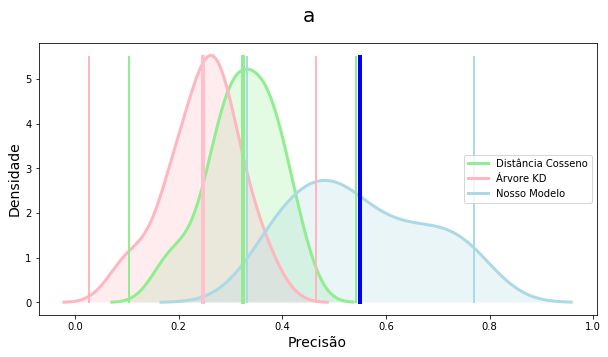

In [476]:
samplesize = 10000

fig = plt.figure(figsize=(10,5))
#plt.hist([v for i,v in enumerate(all_['my'])], 50, density=True, color='lightblue')
#plt.hist([v for i,v in enumerate(all_['tree'])], 50, density=True, color='lightgreen')
sns.distplot([v/50 for i,v in enumerate(all_['skl'])], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color' : 'lightgreen'}, 
                  label = 'Distância Cosseno')
sns.distplot([v/50 for i,v in enumerate(all_['tree'])], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color' : 'lightpink'}, 
                  label = 'Árvore KD')
sns.distplot([v/50 for i,v in enumerate(all_['my'])], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color' : 'lightblue'}, 
                  label = 'Nosso Modelo')

def to_percent(y, position):
    s = str(round(100 * (y/3)))
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
 
fig.suptitle('a', fontsize =20)   
formatter = FuncFormatter(to_percent)

#plt.gca().yaxis.set_major_formatter(formatter)
plt.plot([m,m],[0, 5.5], 'k-', lw=4, color='blue')
plt.plot([m-(1.96*sigma/np.sqrt(samplesize)),m-(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightblue')
plt.plot([m+(1.96*sigma/np.sqrt(samplesize)),m+(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightblue')

plt.plot([mc,mc],[0, 5.5], 'k-', lw=4, color='lightgreen')
plt.plot([mc-(1.96*sigma/np.sqrt(samplesize)),mc-(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightgreen')
plt.plot([mc+(1.96*sigma/np.sqrt(samplesize)),mc+(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightgreen')

plt.plot([mb,mb],[0, 5.5], 'k-', lw=4, color='pink')
plt.plot([mb-(1.96*sigma/np.sqrt(samplesize)),mb-(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightpink')
plt.plot([mb+(1.96*sigma/np.sqrt(samplesize)),mb+(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightpink')
plt.xlabel('Precisão', fontsize =14)
plt.ylabel('Densidade', fontsize =14)

#plt.show()
plt.savefig('books_read.png')

In [465]:
b = 1.0 * np.array(all_['my']-all_['tree'])/50
nb = len(b)
mb, seb = np.mean(all_['my']-all_['tree'])/50, stats.sem(all_['my']-all_['tree'])/50
hb = seb * stats.t.ppf((1 + confidence) / 2., n-1)

c = 1.0 * np.array(all_['my']-all_['skl'])/50
nc = len(c)
mc, sec = np.mean(all_['my']-all_['skl'])/50, stats.sem(all_['my']-all_['skl'])/50
hc = sec * stats.t.ppf((1 + confidence) / 2., n-1)

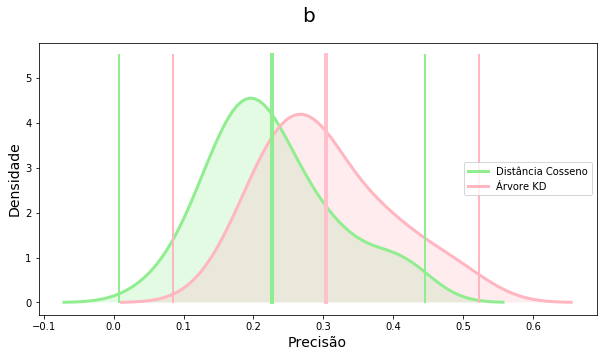

In [466]:
samplesize = 10000

fig = plt.figure(figsize=(10,5))
#plt.hist([v for i,v in enumerate(all_['my'])], 50, density=True, color='lightblue')
#plt.hist([v for i,v in enumerate(all_['tree'])], 50, density=True, color='lightgreen')
sns.distplot([v/50 for i,v in enumerate(all_['my']-all_['skl'])], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color' : 'lightgreen'}, 
                  label = 'Distância Cosseno')
sns.distplot([v/50 for i,v in enumerate(all_['my']-all_['tree'])], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color' : 'lightpink'}, 
                  label = 'Árvore KD')

def to_percent(y, position):
    s = str(round(100 * (y/3)))
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
 
fig.suptitle('b', fontsize =20)   
formatter = FuncFormatter(to_percent)

#plt.gca().yaxis.set_major_formatter(formatter)

plt.plot([mc,mc],[0, 5.5], 'k-', lw=4, color='lightgreen')
plt.plot([mc-(1.96*sigma/np.sqrt(samplesize)),mc-(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightgreen')
plt.plot([mc+(1.96*sigma/np.sqrt(samplesize)),mc+(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightgreen')

plt.plot([mb,mb],[0, 5.5], 'k-', lw=4, color='pink')
plt.plot([mb-(1.96*sigma/np.sqrt(samplesize)),mb-(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightpink')
plt.plot([mb+(1.96*sigma/np.sqrt(samplesize)),mb+(1.96*sigma/np.sqrt(samplesize))],[0, 5.5], 'k-', lw=2, color='lightpink')
plt.xlabel('Precisão', fontsize =14)
plt.ylabel('Densidade', fontsize =14)

#plt.show()
plt.savefig('books_read_b.png')

In [514]:
postings = pd.read_csv('.\data\stanford\consensus.csv')#, lines=True)

In [520]:
postings

,Unnamed: 0,total_postings_11_,total_postings_6_10,total_postings_2_5,max_Urgency,is_Urgency,mean_Urgency,total_opinions,total_postings,cg_c9,...,Question,Answer,Sentiment,Confusion,Urgency,Text,forumpostid,CourseType,coursedisplayname,Vector
0,0,0,0,1,5.5,1,4.333333,2,3,0.0,...,0,1,4,4,3,"['second', 'review', 'Although', 'applied', 'c...",526563a587050a90ef000006,Medicine,Medicine/SciWrite/Fall2013,"[-0.2693302929, 0.0551648661, -0.2781109810000..."
1,1,0,0,1,5.5,1,4.333333,2,3,0.0,...,1,1,4,4,"4,5","['Also', 'got', 'Are', 'going', 'resubmit', 's...",5264e2152cc6095e83000015,Medicine,Medicine/SciWrite/Fall2013,"[-0.1368487179, -0.08157795670000001, -0.11682..."
2,2,0,0,1,5.5,1,4.333333,2,3,0.0,...,0,0,3,4,"5,5","['think', 'system', 'fair', 'reviewers', 'rush...",5263a0de9ec9282178000010,Medicine,Medicine/SciWrite/Fall2013,"[-0.9148202538, 0.6444663405000001, 0.02416610..."
3,3,0,0,0,2.0,0,2.000000,0,1,0.0,...,0,0,5,4,2,"['Thanks', 'It', 'useful', 'think', 'answers',...","5,30483E+23",Humanities,HumanitiesSciences/EP101/Environmental_Physiology,"[-0.1750001609, 0.15370325740000002, -0.219730..."
4,4,1,0,0,6.5,0,2.708333,15,60,0.0,...,1,0,"3,5",4,5,"['Hello', 'Kristin', 'Thank', 'nice', 'usefull...",53e1dfb0fac7aaea13000007,Medicine,Medicine/HRP258/Statistics_in_Medicine,"[-0.21092042330000002, 0.19797407090000002, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,29580,0,0,0,2.5,0,2.500000,1,1,0.0,...,0,0,4,4,"2,5","['understand', 'takes', 'time', 'inflation', '...",53e41deabf0e2c2ba800002f,Humanities,HumanitiesSciences/Econ-1/Summer2014,"[-0.9895020723000001, 0.9867110252000001, -0.3..."
28679,29581,0,0,1,5.5,0,3.250000,1,2,0.0,...,1,0,"3,5",5,"5,5","['Hello', 'Josh', 'If', 'correlated', 'sample'...",53e41fdcbce97d56e1000025,Medicine,Medicine/MedStats/Summer2014,"[0.0112654464, 0.3096439838, -0.2413118333, -0..."
28680,29582,0,0,1,5.5,0,3.250000,1,2,0.0,...,1,1,4,3,1,"['Hello', 'Seema', 'It', 'seems', 'like', 'que...",53e4364ebf0e2c2973000034,Medicine,Medicine/MedStats/Summer2014,"[-0.5008110404, -0.5349773765, 0.0413531549, -..."
28681,29583,0,0,0,2.0,0,2.000000,1,1,0.0,...,0,1,5,4,2,"['This', 'thoughtful', 'piece', 'redacted', 'T...",53e47964bce97d5d4300003e,Humanities,HumanitiesSciences/Econ-1/Summer2014,"[0.0194364265, -0.3702900112, -0.0540920347, -..."


In [541]:
from sklearn.utils import resample

In [548]:
postings.is_Urgency.value_counts()

0    24766
1     3917
Name: is_Urgency, dtype: int64

In [562]:
# Separandos as classes majoritária e minoritária
df_majority = postings[postings.Urgency==0]
df_minority = postings[postings.Urgency==1]
 
# Classe minoritária -  Upsample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # reamostragem com substituição
                                 n_samples=24766,   # para corresponder com a classe majoritária
                                 random_state=101) # para reproduzir os mesmos resultados
 
# Combine a classe majoritária com a classe minoritária upsampled
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


plt.ylabel('Urgência Máxima', fontsize =14)
 
# Exibir a nova contagem da nova classe
df_upsampled.situacao.value_counts()

ValueError: Range cannot be empty (low >= high) unless no samples are taken

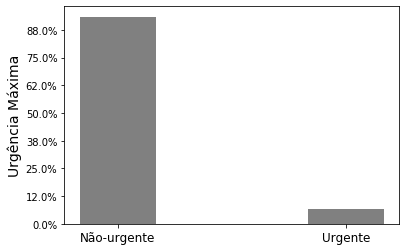

In [540]:
import matplotlib
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    s = str(round(100 * (y/4)))
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
formatter = FuncFormatter(to_percent)

x_labels = ['Não-urgente','Urgente']

fig = plt.Figure(figsize=(10,5))


plt.ylabel('Urgência Máxima', fontsize =14)
#plt.xlabel('Opinião', fontsize =14)
plt.xticks([0.125,0.875],x_labels,fontsize=12)
plt.tick_params(labelbottom = 'off')
plt.gca().yaxis.set_major_formatter(formatter)
plt.hist([1 if v else 0 for v in(postings.loc[postings['cg'] >= 0.8]['Urgency'].str.replace(',','.',regex=False).astype(np.float) >= 4)], bins = 4, cumulative = False,density=True, color='gray', align='mid')

#plt.show()
plt.savefig('uxc.png')

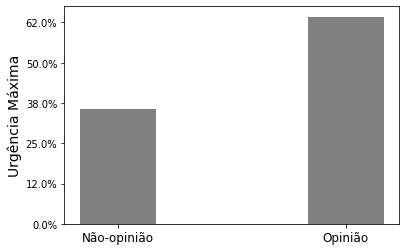

In [557]:
import matplotlib
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    s = str(round(100 * (y/4)))
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
formatter = FuncFormatter(to_percent)

x_labels = ['Não-opinião','Opinião']

fig = plt.Figure(figsize=(10,5))


plt.ylabel('Urgência Máxima', fontsize =14)
#plt.xlabel('Opinião', fontsize =14)
plt.xticks([0.125,0.875],x_labels,fontsize=12)
plt.tick_params(labelbottom = 'off')
plt.gca().yaxis.set_major_formatter(formatter)
plt.hist([v for i,v in enumerate(postingVectors.loc[postingVectors['Urgency'].str.replace(',','.',regex=False).astype(np.float) >= 7]['Opinion'])], bins = 4, cumulative = False,density=True, color='gray', align='mid')

#plt.show()
plt.savefig('opnop.png')

In [506]:
[1 if v else 0 for v in postingVectors['Urgency'].str.replace(',','.',regex=False).astype(np.float) >= 7.0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


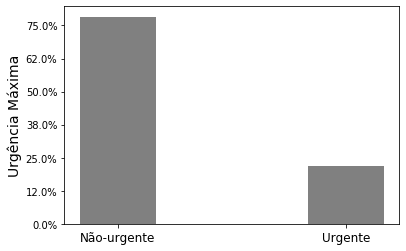

In [555]:
import matplotlib
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    s = str(round(100 * (y/4)))
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
formatter = FuncFormatter(to_percent)

x_labels = ['Não-urgente','Urgente']

fig = plt.Figure(figsize=(10,5))

plt.ylabel('Urgência Máxima', fontsize =14)
#plt.xlabel('Opinião', fontsize =14)
plt.xticks([0.125,0.875],x_labels,fontsize=12)
plt.tick_params(labelbottom = 'off')
plt.gca().yaxis.set_major_formatter(formatter)
plt.hist([1 if v else 0 for v in postingVectors['Urgency'].str.replace(',','.',regex=False).astype(np.float) >= 4.0], bins = 4, cumulative = False,density=True, color='gray', align='mid')

fig.suptitle('U', fontsize =20)

#plt.show()
plt.savefig('unu.png')

In [477]:
intervallist=[]
inter_my = stats.t.interval(0.95, len(all_['my'])-1, loc=np.mean(all_['my']/50), scale=stats.sem(all_['my']/50))
inter_my = [inter_my[0],m,inter_my[1]]
intervallist.append(inter_my)

inter_tree = stats.t.interval(0.95, len(all_['tree'])-1, loc=np.mean(all_['tree']/50), scale=stats.sem(all_['tree']/50))
inter_tree = [inter_tree[0],mb,inter_tree[1]]
intervallist.append(inter_tree)

inter_skl = stats.t.interval(0.95, len(all_['skl'])-1, loc=np.mean(all_['skl']/50), scale=stats.sem(all_['skl']/50))
inter_skl = [inter_skl[0],mc,inter_skl[1]]
intervallist.append(inter_skl)

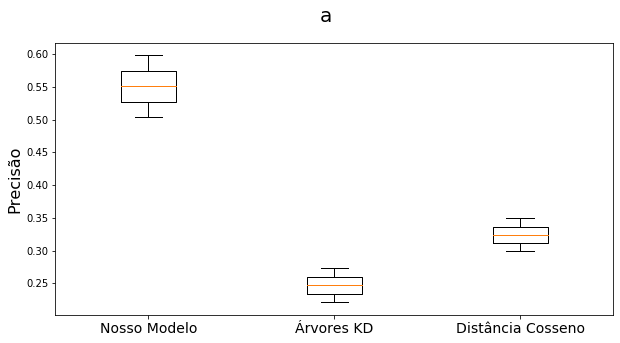

In [478]:
# set figure size.
fig = plt.figure(figsize=(10,5))
# plot box plots of each sample mean.
plt.boxplot(intervallist)

fig.suptitle('a', fontsize =20) 
plt.ylabel('Precisão', fontsize =16)
x_labels = ['Nosso Modelo','Árvores KD','Distância Cosseno']
plt.xticks([1,2,3],x_labels,fontsize=14)
#plt.plot([1, 100],[mu,mu], 'k-', lw=2, color='red')
# show plot.
#plt.show()
plt.savefig('ic_a.png')

In [469]:
intervallist=[]
inter_tree = stats.t.interval(0.95, len(all_['my']-all_['tree'])-1, loc=np.mean((all_['my']-all_['tree'])/50), scale=stats.sem((all_['my']-all_['tree'])/50))
inter_tree = [inter_tree[0],mb,inter_tree[1]]
intervallist.append(inter_tree)

inter_skl = stats.t.interval(0.95, len(all_['my']-all_['skl'])-1, loc=np.mean((all_['my']-all_['skl'])/50), scale=stats.sem((all_['my']-all_['skl'])/50))
inter_skl = [inter_skl[0],mc,inter_skl[1]]
intervallist.append(inter_skl)

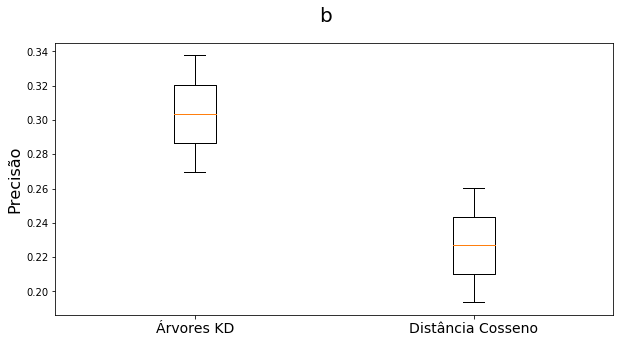

In [470]:
# set figure size.
fig = plt.figure(figsize=(10,5))
# plot box plots of each sample mean.
plt.boxplot(intervallist)

fig.suptitle('b', fontsize =20) 
plt.ylabel('Precisão', fontsize =16)
x_labels = ['Árvores KD','Distância Cosseno']
plt.xticks([1,2],x_labels,fontsize=14)

#plt.show()
plt.savefig('ic_b.png')

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([a for a in any_my if a > 1.0], 50, density=True, color='lightblue')
plt.hist([v for i,v in enumerate(all_[1]) if all_[0][i] > 1.0], 50, density=True, color='lightgreen')
plt.show()

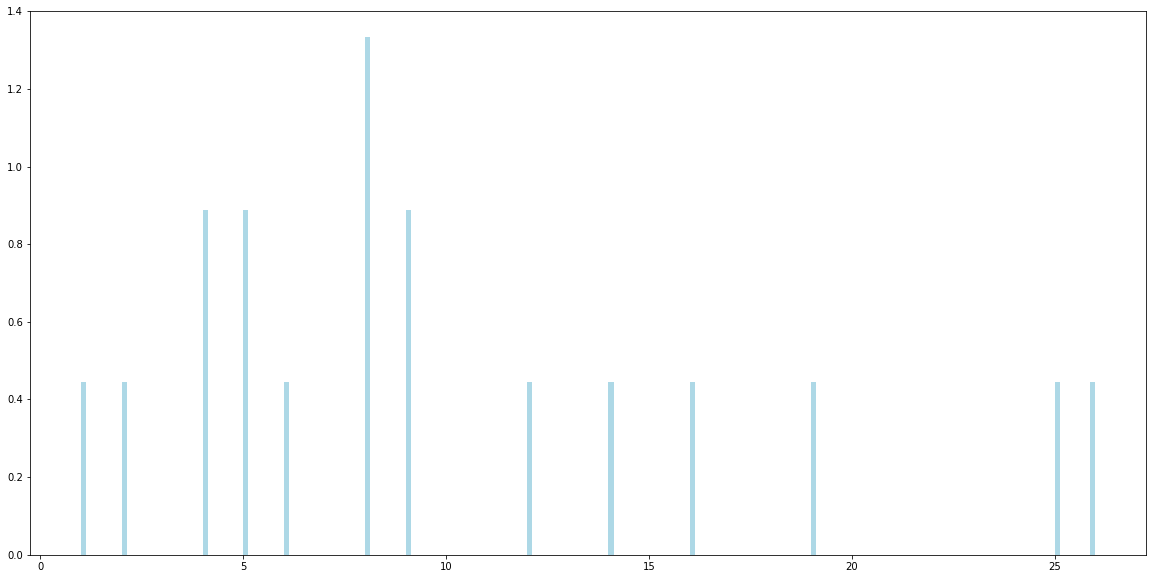

In [71]:
plt.figure(figsize=(20,10))
plt.hist([v for i,v in enumerate(all_[1]) if all_[0][i] > 1.0], 200, density=True, color='lightblue')
plt.show()

In [ ]:

# set mean and 95% probability
plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.show()

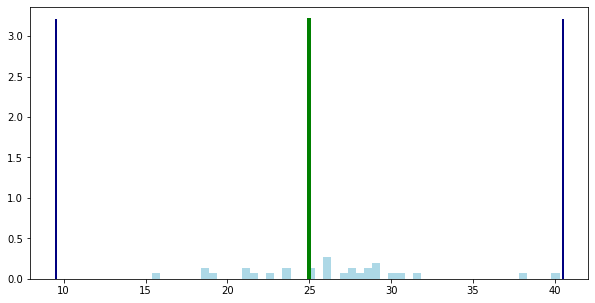

In [34]:
# use gamma distribution
shape, scale = 5.0, 5.0  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
mu = shape*scale # mean and standard deviation
sigma = scale*np.sqrt(shape)
samplesize = 2

plt.figure(figsize=(10,5))
plt.hist([v for i,v in enumerate(all_['my'])], 50, density=True, color='lightblue')
#plt.hist([v for i,v in enumerate(all_['tree'])], 50, density=True, color='lightgreen')

plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')

plt.show()

In [ ]:
a = posting_vectors['Text'][0]
b = posting_vectors['Vector'][0]

In [ ]:

sorted_1 = pd.DataFrame({'similarity':[m.wv.wmdistance(a, text) for text in posting_vectors['Text']],'forumpostid':posting_vectors['forumpostid'],'Text':posting_vectors['Text'],'Opinion':posting_vectors['Opinion']}).sort_values('similarity')

In [ ]:
sorted_2 = pd.DataFrame({'similarity':[ distance.cosine(b, vector) for vector in posting_vectors['Vector']],'forumpostid':posting_vectors['forumpostid'],'Text':posting_vectors['Text'],'Opinion':posting_vectors['Opinion']}).sort_values('similarity')

In [ ]:
#sorted_3 = kdTree.myKdHashs(postingVectors['Vector'][0],edge=0.55)

sorted_3 = pd.DataFrame({'similarity':kdTree.myKdHashs(postingVectors['Vector'][0],edge=0.55),'forumpostid':posting_vectors['forumpostid'],'Text':posting_vectors['Text'],'Opinion':posting_vectors['Opinion']}).sort_values('similarity')

In [96]:
X = np.random.RandomState(0).random_sample((30000,300))

In [100]:
postingVectors['Vector'].values

array([list([-0.2693302929, 0.0551648661, -0.27811098100000003, -0.0054707555000000005, 0.29981711510000003, -0.5688290596000001, 0.4683666527, 0.1510740519, -0.1789328903, 0.2737765312, -0.4122747183, -0.0707497671, 0.0454182699, 0.1665255874, 0.1529021263, 0.0155627765, -0.3024668694, -0.31079488990000004, -0.039467427900000004, -0.2769312263, -0.07534601540000001, -0.24198661740000002, 0.3648729324, -0.1632507145, 0.2604548335, 0.2724131346, -0.039261136200000005, -0.2390888333, -0.4213366508, -0.8990999460000001, -0.4105063379, 0.1708329916, -0.4961123168, 0.16099783780000002, 0.1859222651, -0.028956683400000002, 0.0992342159, -0.24596536160000002, 0.3304693997, -0.29656201600000004, 0.0222214703, 0.4408585131, -0.1167724356, 0.20590241250000002, 0.2758010924, 0.0888359398, 0.3841733932, -0.2703200281, 0.5918852091, 0.3075214922, -0.0748771876, 0.0023966921, -0.1338041574, -0.0713993534, 0.2686851323, 0.0622501113, 0.12730321290000002, 0.0948024169, 0.0177760925, -0.409346908300000

In [1]:
tree = KDTree(postingVectors['Vector'].values,leaf_size = 2)

NameError: name 'KDTree' is not defined

In [ ]:
dist, ind = tree.query(X[:1],k=3)
print(ind)

In [ ]:
dist, ind = tree.query(vectors.values[:1],k=40)
print(ind)

In [ ]:
#carregando o modelo já treinado de Doc2Vec para medir as distâncias entre vetores por wmdistance
m = g.Doc2Vec.load(model)

In [ ]:
distances_kdhash.values[0][0]['rows']

In [ ]:
#str_ = ""
count0 = 0
sum_ = 0
for i, v in distances_extended_kdhash.iterrows():
    count = 0
    count0 = count0 + 1
    for j, w in enumerate(v.values[0]['rows']):
        count = count + 1
        #print(w['forumpostid'])
        ###print(count0)
        ###print(j)
        ###print(w['forumpostid'])
        #if(w['forumpostid'] != None):
        ###print(distances_extended_kdhash.loc[w['extended_hash']])
        #str_ = [v['forumpostid'] for k, v in enumerate(list(distances_extended_kdhash.loc[w['extended_hash']]['Partition']['rows'].values()))]
        #break
    if(count > 1):
        print(count0)
        sum_ = sum_ + count
print(sum_)
    #break
#     v.values[0]['rows']
#     v.values[0]['lastChange']
#     v.values[0]['hash_']
#print(list(distances_kdhash.loc[i]['Partition']['rows'].values())[0])

print(str_)

In [ ]:
#str_ = ""
count0 = 0
sum_ = 0
for i, v in distances_kdhash.iterrows():
    count = 0
    count0 = count0 + 1
    for j, w in enumerate(v.values[0]['rows']):
        count = count + 1
        #print(w['forumpostid'])
        ###print(count0)
        ###print(j)
        ###print(w['forumpostid'])
        #if(w['forumpostid'] != None):
        ###print(distances_extended_kdhash.loc[w['extended_hash']])
        #str_ = [v['forumpostid'] for k, v in enumerate(list(distances_extended_kdhash.loc[w['extended_hash']]['Partition']['rows'].values()))]
        #break
    if(count > 1):
        print(count0)
        sum_ = sum_ + count
print(sum_)
    #break
#     v.values[0]['rows']
#     v.values[0]['lastChange']
#     v.values[0]['hash_']
#print(list(distances_kdhash.loc[i]['Partition']['rows'].values())[0])

print(str_)

In [ ]:
#pd.DataFrame([x[i] for i in x] for x in posting_vectors['Vector'])
posting_vectors_sample = postingVectors#.sample(n=len(posting_vectors)//10)
vectors = pd.DataFrame(x for x in posting_vectors_sample['Vector'].astype(np.array(np.float)))
#vectors_sample = sample(vectors,len(vectors)//100)

In [ ]:
len(vectors.values)

In [ ]:
#sum_ = posting_vectors['Opinion'].sum()
sum_ = posting_vectors_sample['Opinion'].sum()

max_ = sorted([vectors[x].sort_values().reset_index()[x][len(vectors)-1] for x in vectors.columns])
max_ = vectors[0].sort_values()
max_


In [ ]:
vectors

In [ ]:
pd.DataFrame(posting_vectors.Vector.astype(np.array(np.float)))

In [ ]:
kmeans_model = KMeans(n_clusters=11, random_state=1).fit(pd.DataFrame(x for x in posting_vectors['Vector'].astype(np.array(np.float))))
kmeans_model.labels_

In [ ]:
def partition(list_, cmp, start, end):
    pivot = list_[end]
    bottom = start-1
    top = end

    done = 0
    while not done:

        while not done:
            bottom = bottom + 1

            if bottom == top:
                done = 1
                break

            if cmp(list_[bottom], pivot):
                list_[top] = list_[bottom]
                break

        while not done:
            top = top-1

            if top == bottom:
                done = 1
                break

            if cmp(list_[top], pivot):
                list_[bottom] = list_[top]
                break

    list_[top] = pivot
    return top

def quicksort(list_, cmp=lambda x, y: x > y, start=None, end=None):
    print('step:', start)
    if start is None: start = 0
    if end is None: end = len(list_)
    if start < end:
        split = partition(list_, cmp, start, end)
        quicksort(list_, cmp, start, split-1)
        quicksort(list_, cmp, split+1, end)
    else:
        return

In [ ]:
def partition(array, begin, end, cmp):
    while begin < end:
         while begin < end:
            if cmp(array[begin], array[end]):
                (array[begin], array[end]) = (array[end], array[begin])
                break
            end -= 1
         while begin < end:
            if cmp(array[begin], array[end]):
                (array[begin], array[end]) = (array[end], array[begin])
                break
            begin += 1
    return begin

def sort(array, cmp=lambda x, y: x > y, begin=None, end=None):
    print('step:', begin)
    if begin is None: begin = 0
    if end   is None: end   = len(array)
    if begin < end:
        i = partition(array, begin, end-1, cmp)
        sort(array, cmp, begin, i)
        sort(array, cmp, i+1, end)

In [ ]:
a = posting_vectors['Text'][0]
def cmp_(x, y):
    dx = m.wv.wmdistance(a, x)   
    dy = m.wv.wmdistance(a, y)  
    return dx > dy

In [ ]:
m.wv.distance(a, posting_vectors['Text'][2]) 

In [ ]:
m.wv.distance(a, posting_vectors['Text'][3]) 

In [ ]:
m.wv.distance(a, posting_vectors['Text'][4]) 

In [ ]:
#quicksort(posting_vectors['Text'],cmp_,1,len(posting_vectors)-1)
sorted_=sorted(posting_vectors.sample(n=len(posting_vectors)//100)['Text'], key=lambda x: m.wv.wmdistance(a, x) )

In [ ]:
sorted_=pd.DataFrame(sorted(posting_vectors.itertuples(), key=lambda x: m.wv.wmdistance(a, getattr(x, "Text")) ))

In [ ]:
sorted_1 = pd.DataFrame({'similarity':[m.wv.wmdistance(a, text) for text in posting_vectors['Text']],'forumpostid':posting_vectors['forumpostid'],'Text':posting_vectors['Text'],'Opinion':posting_vectors['Opinion']}).sort_values('similarity')

In [ ]:
#sorted_1 = sorted_1.sort_values('similarity')

In [ ]:
from scipy.spatial import distance

b = posting_vectors['Vector'][0]

In [ ]:
distance.cosine(b, posting_vectors['Vector'][2])

In [ ]:
distance.cosine(b, posting_vectors['Vector'][3])

In [ ]:
distance.cosine(b, posting_vectors['Vector'][4])

In [ ]:
posting_vectors['Opinion'].head()

In [ ]:

sorted_2=pd.DataFrame(sorted(posting_vectors.itertuples(), key=lambda x: distance.euclidean(b, getattr(x, "Vector")) ))

In [ ]:
sorted_2 = pd.DataFrame({'similarity':[ distance.cosine(b, vector) for vector in posting_vectors['Vector']],'forumpostid':posting_vectors['forumpostid'],'Text':posting_vectors['Text'],'Opinion':posting_vectors['Opinion']}).sort_values('similarity')

In [ ]:
sorted_2.loc[sorted_1['Opinion']==1].head(n=40)

In [ ]:
sorted_1.loc[sorted_1['Opinion']==1].head(n=40)

In [ ]:
posting_vectors['Vector'] = [np.asarray(x[0]) for x in posting_vectors['Vector']]

In [ ]:
posting_vectors['Vector'].values

In [ ]:
#posting_vectors[['Vector']].apply(np.array).values[0][0]

In [120]:
postingVectors.loc[postingVectors['coursedisplayname']=='Education/EDUC115N/How_to_Learn_Math']['Vector']

1983     [0.0947588906, -0.050367333, -0.1427371353, -0...
1984     [-0.056507278200000004, -0.0314513296, -0.1544...
1985     [0.1139309481, -0.033933863, -0.2274121791, 0....
1986     [0.37959185240000004, 0.6899300814, -0.1423310...
1987     [0.2655808628, 0.15036243200000002, -0.2718258...
                               ...                        
15881    [-0.2749390006, -0.4198676646, -0.619977653000...
15882    [0.1757790148, -0.061979632800000004, -0.00465...
26616    [0.039255131000000006, 0.5851991177, -0.355728...
26617    [0.24530668560000002, 0.642578125, 0.292200177...
26717    [-0.019046299200000002, -0.1622246802, -0.2259...
Name: Vector, Length: 9878, dtype: object

In [241]:
color_map = {0 : 'r', 1 : 'k', 2 : 'b', 3 : 'g', 4 : 'y', 5 : 'b', 6 : 'w', 7: 'p', 8 : 'o', 9 : 'c', 10 : 'm'}

#color_map = {0 : '\033[95m', 1 : '\033[96m', 2 : '\033[36m', 3 : '\033[94m', 4 : '\033[92m', 5 : '\033[93m', 6 : '\033[91m', 7 : '\033[1m', 8 : '\033[4m', 9 : '\033[0m'}

In [248]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
#pca.fit(posting_vectors['Vector'].values)
#pca.fit(vectors.sample(n=len(vectors)//10))
vectors2 = pd.DataFrame(x for x in postingVectors.loc[postingVectors['coursedisplayname']=='HumanitiesSciences/EP101/Environmental_Physiology']['Vector'].astype(np.array(np.float)))
pca.fit(vectors2)


#r2 = pca.transform(posting_vectors.loc[:,['Vector']].values)
r2 = pca.transform(vectors2.sample(n=len(vectors)//2))
# kmeans_model = KMeans(n_clusters=10, random_state=1).fit(pd.DataFrame(r2))
# kmeans_model.labels_
# #colors = [label[l] for l in kmeans_model.labels_]
# plt.scatter(r2[:,0], r2[:,1],c=kmeans_model.labels_)
#plt.savefig('cluster_2d_c.png')

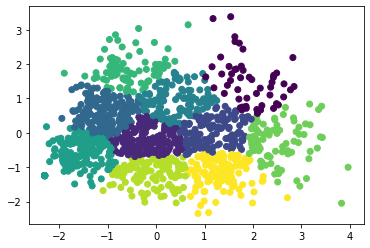

In [256]:
kmeans_model = KMeans(n_clusters=10, random_state=1).fit(pd.DataFrame(r2))
kmeans_model.labels_
#colors = [label[l] for l in kmeans_model.labels_]
plt.scatter(r2[:,0], r2[:,1],c=kmeans_model.labels_)

In [255]:
kmeans_model = KMeans(n_clusters=10, random_state=1).fit(pd.DataFrame(r2))
kmeans_model.labels_

array([4, 4, 9, ..., 9, 5, 8])

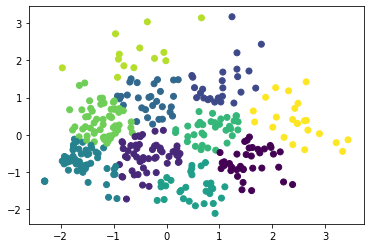

In [155]:
plt.scatter(r2[:,0], r2[:,1],c=kmeans_model.labels_)

In [ ]:
np.unique(posting_vectors['coursedisplayname'])

In [80]:
vectors

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.269330,0.055165,-0.278111,-0.005471,0.299817,-0.568829,0.468367,0.151074,-0.178933,0.273777,...,-0.139964,0.097397,-0.625814,0.068898,-0.546254,-0.625644,0.087791,0.445532,-0.751241,-0.366989
1,-0.136849,-0.081578,-0.116823,-0.338577,-0.130409,-0.269979,0.246939,0.131820,-0.317070,-0.468146,...,-0.550076,0.223203,-0.432700,0.117709,-0.114757,-0.622041,0.150136,0.580579,-0.392031,0.023026
2,-0.914820,0.644466,0.024166,-0.549968,-0.567901,0.425656,0.533654,-0.301505,-0.590461,-0.241802,...,-0.817548,-0.065287,-0.522273,0.143823,-0.089299,-0.162735,0.315825,0.150365,-0.321871,-0.835516
3,-0.175000,0.153703,-0.219731,-0.191493,-0.266664,0.242585,0.548803,-0.093570,0.207065,-0.052823,...,-0.148060,0.338511,-0.379760,-0.003899,0.234423,-0.272405,0.027989,0.833140,-0.151984,0.300446
4,-0.210920,0.197974,-0.287677,0.039659,0.355964,-0.074600,0.620403,-0.042539,-0.570014,0.047184,...,-0.451070,0.259507,0.299758,-0.735790,-0.189069,-0.863953,-0.020744,0.302511,-0.265418,-0.013068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29580,-0.989502,0.986711,-0.362362,-0.332079,-0.167663,0.555027,0.346573,-0.536925,-0.586590,-0.115610,...,0.326975,1.118781,0.353004,0.187647,1.048174,-0.154302,-0.135895,0.596018,-0.357066,-0.372093
29581,0.011265,0.309644,-0.241312,-0.213913,-0.481682,0.083154,-0.222768,-0.888246,-1.039195,0.368715,...,-0.042145,0.224547,-0.422488,0.056609,0.099315,0.046799,0.057913,0.728848,0.453058,-0.900861
29582,-0.500811,-0.534977,0.041353,-0.009343,-0.224578,0.190302,0.424143,-0.246446,-0.954875,0.090530,...,-0.013872,0.753570,-0.273102,0.167288,-0.203086,-0.571491,0.340077,0.887216,0.061262,-0.605473
29583,0.019436,-0.370290,-0.054092,-0.270568,-0.152839,-0.117887,0.275436,-0.194502,0.044051,-0.150807,...,-0.199794,0.018928,0.031562,0.019213,0.245517,-0.156316,-0.126925,0.316880,0.051936,-0.211935


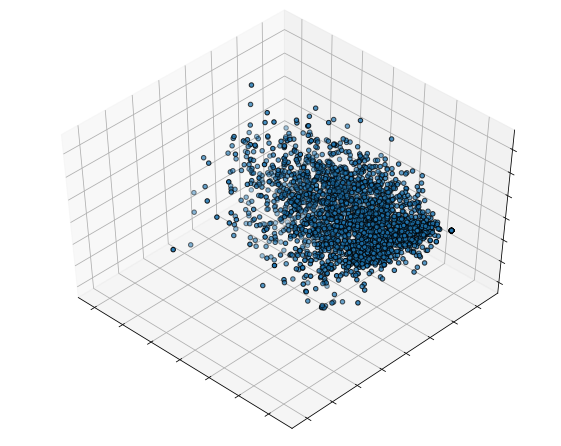

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

#centers = [[1, 1], [-1, -1], [1, -1]]
#iris = datasets.load_iris()
X = vectors.sample(n=len(vectors)//1)#iris.data
#y = iris.target

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], #c=y, 
           cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [211]:
kmeans_model = KMeans(n_clusters=10, random_state=1).fit(pd.DataFrame(X))
kmeans_model.labels_

array([3, 3, 8, ..., 8, 3, 8])

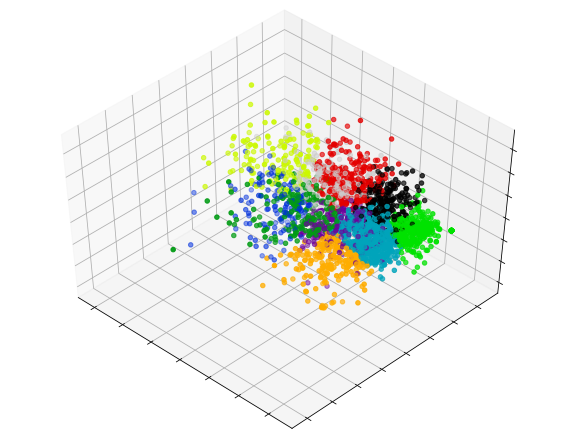

In [212]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], #c=y, 
           cmap=plt.cm.nipy_spectral,
           c=kmeans_model.labels_)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
jmp = 100
for index1 in sorted_.copy():
    if (index1 < jmp):
        jmp_aux = index1
    else:
        jmp_aux = jmp
    for index2, row2 in sorted_.loc[index1-jmp_aux:].copy().iterrows():
        pass #reordenar sorted_

In [ ]:
a

In [ ]:
for k, i in zip(posting_vectors.Text,posting_vectors.index):
    for j in posting_vectors.Text:
        print(i,"-",m.wmdistance(k, j))

In [ ]:
print("Verifing")
 
jmp = 2
k = sum_//2
range_ = 0.3
current_interia = 0
while(k - sum_ <= jmp):
    #for k in enumerate(np.unique(posting_vectors['coursedisplayname'])):
    #for k in range (1, sum_):

    
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    #kmeans_model = KMeans(n_clusters=k, random_state=1).fit(postings_docs.iloc[:, :])
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(vectors)
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print("k:",k, " cost:", interia)
    if(current_interia == 0):
        current_interia = interia
    if(interia >= current_interia - range_):
        current_interia = interia
        k = k - (k - sum_)//2
    else:
        current_interia = interia
        k = k + (k - sum_)//2
    
    
 
